# Étude de cas 2
### Outils et méthodologies de Résolution des problèmes partie 1 
(Questions 1-6)
#### Situation

NOLTACED est une chaîne de trois
magasins qui livre des produits
agroalimentaires frais. Après une période
de croissance rapide, NOLTACED a vu son
chiffre d'affaires baisser pendant six mois.
Le comité de direction a décidé de former
une équipe composée des directeurs des
magasins, de personnel de production et
de livreurs pour essayer de découvrir ce
qui se passait et de générer un plan
d'action pour redresser la situation.
L’équipe a suivi un standard global de
résolution des problèmes.

In [1]:
# Importation des dépendances 
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib.ticker import PercentFormatter
import matplotlib.image as mpimg
from scipy import stats

## 1 - Pareto

In [2]:
defauts = pd.read_excel("data/défauts.xlsx")
defauts

,défaut,Qt
0,Quantité non respectées,300
1,Mauvais goût,150
2,Retard de la livraison,1900
3,Saletés,200
4,Aliments pas frais,1400
5,autres,100


In [3]:
defauts = defauts.sort_values(by=["Qt"], ascending=False)
pareto = defauts.copy()
vals_sum = pareto.sum()
pareto["fréquence"] = (pareto["Qt"] / vals_sum["Qt"])*100
vals = pareto["fréquence"].to_list()
for i in range(1,pareto.shape[0]):
    vals[i] += vals[i-1]
pareto["cumul"] = vals
pareto["index"] = pareto.index
pareto

,défaut,Qt,fréquence,cumul,index
2,Retard de la livraison,1900,46.913580,46.913580,2
4,Aliments pas frais,1400,34.567901,81.481481,4
0,Quantité non respectées,300,7.407407,88.888889,0
3,Saletés,200,4.938272,93.827160,3
1,Mauvais goût,150,3.703704,97.530864,1
5,autres,100,2.469136,100.000000,5


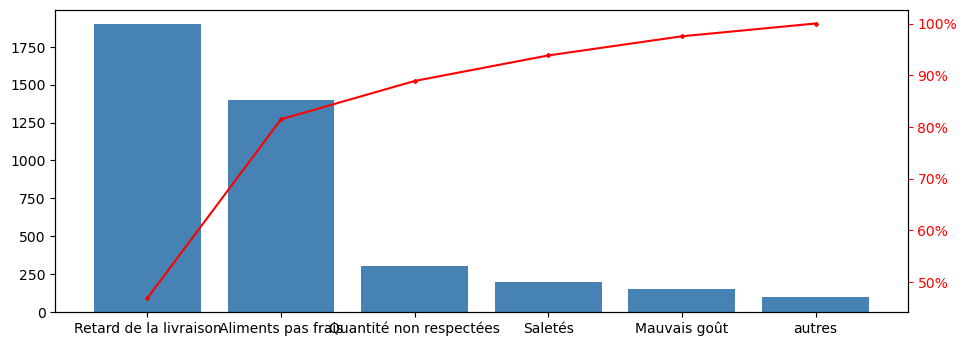

In [4]:
fig, ax = plt.subplots()
fig.set_dpi(100)

fig.set_size_inches(11, 4)
ax.bar(pareto.défaut, pareto['Qt'], color='steelblue')
ax2 = ax.twinx()
ax2.plot(pareto.défaut, pareto['cumul'], marker="D", ms=2, color="red")

ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y')
ax2.tick_params(axis='y', colors="red")

plt.show()

## 2 - Formalisation du problème 

Afin de bien définir le problème d'une manière claire, nous utiliserons l'outil QQOQCCP.

### <font color='blue'>Quoi ?</font> 
•	Il s’agit d’un retard de livraison<br>
•	La majorité des plaintes Clients sont dues à la livraison tardive<br>
•	Les conséquences : dégradation de la qualité du produit | mécontentement des clients | détérioration de l'image du produit ou de l'entreprise NOLTACED<br>
•	Les risques : pénalités | maladies des clients à cause des produits non frais | retour client et perte de l’entreprise <br>

### <font color='blue'>Qui?</font> 

•	l'entreprise NOLTACED

### <font color='blue'>Où ? </font> 

- Magasin de stockage <br>
- Chaîne de production (usine)<br>
- Route …<br>

### <font color='blue'>Quand ?</font> 

- La période Juillet – Décembre<br>
- Plus de six mois <br>
- Au début de la saison d’été<br>  


### <font color='blue'>Comment ?</font> 


- Ce problème se manifeste par la diminution des commandes clients <br>
- Augmentation du nombre de réclamations clients<br>
- Les actions des protagonistes : formation d’une équipe des directeurs des magasins, du personnel de production, des livreurs… pour générer un plan d’action <br>
- Les procédures : étudier les plaintes clients et les classifier en catégories de <br>

### <font color='blue'>Combien ?</font> 


- 1900 réclamations à propos de la livraison tardive <br> 
- Retard de livraison = délai qui dépasse les 3 jours <br>  

### <font color='blue'>Pourquoi ?</font> 


- Les causes racines  

## 3 - les estimations de tendance et de variabilité

In [5]:
data = pd.read_excel('data/délai de liv.xlsx', index_col=0).reset_index()
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
délai de livraison,4.9,3.6,3.2,3.6,2.2,2.5,2.3,4.1,5.9,6.0,...,1.5,2.1,5.9,4.3,4.2,4.6,2.9,3.1,3.3,3.5


In [6]:
mean = data['délai de livraison '].mean()
ect = data['délai de livraison '].std()
median_value = np.percentile(data['délai de livraison '], 50) 
R = max(data['délai de livraison ']) - min(data['délai de livraison '])
print("la moyenne = ",mean)
print("l'écart-type = ",ect)
print("la médiane = ",median_value)
print("l'étendu = ",R)

la moyenne =  3.5239999999999996
l'écart-type =  1.2859108315379673
la médiane =  3.5
l'étendu =  5.0


## <font color='green'>$ \bar{X}= 3.524 \ \ | \ \ \sigma = 1.286 \ \ | \ \ Me = 3.5 \ \ | \ \ R = 5.0 $</font> 


## 4 - Traçage des données 

<AxesSubplot:ylabel='Density'>

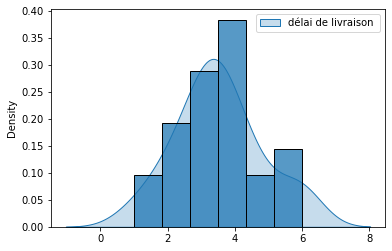

In [7]:
sns.histplot(data=data, stat='density')
sns.kdeplot(data=data, fill=True)

### 4 - 1 Teste de normalité

In [8]:
sp = stats.shapiro(data)
p_value = sp.pvalue
print(p_value) 

0.46091851592063904


## <font color='green'>$ p\_value = 0.461 $</font> 

## 5 - Conclusion  

On déduit que :
-	La distribution du délai de livraison suit la loi normale 
-	La médiane vaut 3.5 alors plus de 50% de nos commandes sont en retard 
-	Std = 1.259 ; R = 5, grande dispersion  


## 6 - Fishbone diagram

Afin de classer et de visualiser les causes du la livraison tardive, nous utiliserons <b class="term">le diagramme d'Ishikawa </b>(Fishbone diagram) <b class="term">5M</b>.

<img style="border:1px dashed DarkSlateBlue;  border-radius: 15px;"  src=".\data\Fishbone.png" width = 800 height =800>